Jorge Ortiz. IA2. Github: https://github.com/jorgeortizc05/ia2

## Boletín de prácticas 2
### Objetivos:
* Familiarizarse con los principales aspectos y etapas del método de descenso por gradiente para funciones que dependen de dos variables $f(x,y)$.
* Conocer cómo aplicar el proceso de descenso por gradiente de forma automatizada con soporte de **sympy** y **Jupyter Notebook*.

### Enunciado:

1. Seleccionar una función matemática $f(x,y)$ para realizar el proceso de minimización. Ejecutar al menos **3 pasos** del método de descenso por gradiente. 
2. Diseñar y desarrollar un cuaderno en Jupyter Notebook donde se realicen todos los pasos correspondientes al proceso de minimización de la función a través del método de descenso por gradiente.
3. El cuaderno deberá incluir los siguientes puntos:
    1. Gráfica de la función y los puntos que se obtienen a medida que se ejecutan los pasos de cálculo (hasta $k=3$).
    2. Aplicación de las funciones de derivación y evaluación de forma similar a la que se ha detallado en el presente cuaderno.
    3. Incluir un acápite sobre las funciones cóncavas y los puntos estacionarios (incluir gráficos).
    4. Emplear las funcionalidades que proveen los paquetes **matplotlib** y **sympy**.

  
### Criterios de evaluación:
Los criterios o rúbrica de evaluación del Boletín de Prácticas 2 son los siguientes:
1. Adecuada complejidad de la función seleccionada para el proceso de minimización (procurar no usar funciones cóncavas).
2. Mejorar la gráfica en 3D presentada en este cuaderno.
3. Correcta explicación y detalle de cada paso ejecutado con el método de descenso por gradiente.
4. Verificación de la solución encontrada.
5. Elementos extra: incluye recta (flecha) con la dirección del gradiente, animaciones, etc.
6. Ejecutar los pasos indicados en el segundo video-tutorial.

### Prerrequisitos:
A fin de poder realizar esta práctica, deberá contar con los siguientes prerrequisitos:
1. Haber leído de forma completa el presente cuaderno.
2. Tener instalados los siguientes paquetes en su computador:
    1. Python 2.7+ (de preferencia 3.6+)
    2. [Sympy](http://www.sympy.org)
    3. [matplotlib](https://matplotlib.org/)


### Detalles de la entrega:
El cuaderno de Jupyter Notebook deberá ser cargado en el AVAC con todos los recursos necesarios (imágenes, enlaces, etc.) en un archivo comprimido, dentro de la tarea **Boletín de Prácticas 2: Descenso por gradiente f(x,y)**. Los detalles de la fecha y hora de entrega se encuentran especificados en el AVAC.

## Ejemplo de aplicación:

Punto de partida es $x^{(0)}=(3,4)$:

$f(x,y)=3x^{3}+2xy+5y^{3}+8.9$

GRAFICA

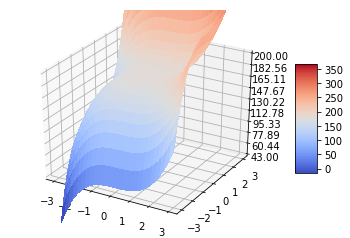

In [1]:
import matplotlib.pyplot as pp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

%matplotlib inline

def fxy(x,y):
    return (3*np.power(x,3.)+2*np.dot(x,y)+5*np.power(y,3.)+8.9)


fig=pp.figure()
#fig.set_size_inches(17.,10.)
axes=fig.gca(projection='3d')

x=np.arange(-3.,3.,0.23)
y=np.arange(-3.,3.,0.23)

x, y = np.meshgrid(x,y) # creamos la malla
z=fxy(x,y)

# Dibujamos la superficie
surface=axes.plot_surface(x,y,z,cmap=cm.coolwarm,linewidth=0,antialiased=False)

axes.set_zlim(43.,200.)
axes.zaxis.set_major_locator(LinearLocator(10))
axes.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surface, shrink=0.5, aspect=5)
pp.show()

### Resolución usando el método de Descenso por Gradiente [3]:

Dado que no conocemos el valor óptimo de $x$, hacemos $k\leftarrow 0$, como nos indica el algoritmo. A continuación procedemos a calcular los siguientes elementos:

* La derivada **parcial** de la función original $f(x,y)=3x^{3}+2xy+5y^{3}+8.9$.
* Evaluamos la función original en el punto $x^{(0)}=(3,4)$.

In [2]:
from sympy import Function, Symbol, diff, solve

x=Symbol('x')
y=Symbol('y')
f=Function('f')(x)

fx=3*x**3+2*x*y+5*y**3+8.9

fpx=diff(fx,x)
fpy=diff(fx,y)
print("[",fpx,",",fpy,"]")

print("Valor en el punto (x^(0),y^(0)) => (3,4) = ",fx.subs(x,3.).subs(y,4.).evalf())

[ 9*x**2 + 2*y , 2*x + 15*y**2 ]
Valor en el punto (x^(0),y^(0)) => (3,4) =  433.900000000000


Lo que nos da como resultado los siguientes valores:

$\nabla f(x,y) =  \binom{\frac{\partial f(x,y)}{\partial x}}{\frac{\partial f(x,y)}{\partial y}}= \binom{9x^{2}+2y}{2x+15y^{2}} $

$\nabla f\left((x^{(0)},y^{(0)}) = (3,4)\right) = 433.9$


1. Ahora buscaremos encontrar el siguiente punto con coordenadas $\left(x^{(k+1)}, y^{(k+1)}\right)$, para ello debemos calcular:
<div style="text-align:center">
    <br />$\left(x^{(1)},y^{(1)}\right)=(x^{(0)},y^{(0)})-t^{*}_{0} \nabla f(x^{(0)},y^{(0)})$ <br />
    <br />
</div>
2. Para encontrar el valor de $t^{*}_{0}$, debemos hallar el mínimo de la función $\theta(t) = f(x^{(0)},y^{(0)})-t \nabla f(x^{(0),y^{(0)}}$. Para realizar este paso, buscamos en el punto estacionario trabajando con la derivada de la función a minimizar. En este punto, usaremos una notación vectorial:

  - Para esto, calculamos el valor de $t^{*}_{k}$ empleando el punto $x^{(0)}$, y la función de $t$ y en base a la derivada de la función a minimizar:
<div style="text-align:center">
    <br />$\theta^{'}(t)=-\nabla f\left( (x^{(0)},y^{(0)} )- t \nabla f(x^{(0)},y^{(0)}) \right) \nabla f(x^{(0)},y^{(0)})$ <br/ >
    <br />$=-\nabla f\left( (3,4)- t \nabla f(3,4)  \right) \nabla f(x^{(0)},y^{(0)})$ <br/ >
</div>   
   Para hallar $\nabla f(x^{(0)},y^{(0)})$, simplemente sustituimos el punto $(3,4)$ en ambas partes de la función original que se derivó con respecto a $x$ y con respecto a $y$:
   
<div style="text-align:center">
   <br/ >$\nabla f(x^{(0)},y^{(0)}) = \binom{9x^{2}+2y}{2x+15y^{2}}$ <br/ >
   <br/ >$\nabla f(3,4) = \binom{9\cdot 3^{2}+2(4)}{2(3)+15\cdot 4^{2}}$ <br/ >
   <br/ >$\nabla f(3,4) = (89, 246)$ <br/ >
</div>

   Con ello, ahora volvemos a la función $\theta^{'}(t)$ y reemplazamos el valor calculado:
<div style="text-align:center">
    <br />$=-\nabla f\left( (3,4)- t (89,246)  \right) (89,246)$ <br/ >
    <br />$=-\nabla f\left( (3-89t),(4-246t) \right) (89,246)$ <br/ >
</div>   
   Ahora, evaluamos la función que derivamos con los nuevos valores $x=(3-89t), y=(4-246t)$:
<div style="text-align:center">
    <br />$=-\left( 9\cdot (3-89t)^{2}+2(4-246t), 2(3-89t)+15\cdot (4-246t)^{2} \right) (89,246)$ <br/ >
    <br />$=-\lbrace{ 89\left( 9\cdot (3-89t)^{2}+2(4-246t)\right)+246\left( 2(3-89t)+15\cdot (4-246t)^{2} \right) \rbrace}$ <br/ >
 <br/ >
</div>   
   Factoramos con ayuda de **sympy** y buscamos las raíces:

In [3]:
t=Symbol('t')
ft=Function('ft')(t)

fnabla=-(89.*(9.*(3.-89.*t)**2+2.*(4.-246.*t))+246.*(2.*(3.-89.*t)+15*(4.-246.*t)**2))

print(fnabla.expand())

fnablap=fnabla.diff(t)


print("Derivada para buscar raices: ",fnablap)
print("Raices: [",solve(fnablap),"]")

-229648761.0*t**2 + 7777230.0*t - 68437.0
Derivada para buscar raices:  -459297522.0*t + 7777230.0
Raices: [ [0.0169328803824898] ]


Con ello, nuestra ecuación en función de $t$ queda como sigue:
<div style="text-align:center">
    <br />$=-229648761t^{2} + 7777230t - 68437$<br/ >
</div>   
   Y la raíz que encontramos luego de derivarla (ya que nos salen valores imaginarios) es $t_{0}=0.0169$. <br /> <br />
   
   
3. Dado lo anterior, el siguiente punto $(x^{(1)},y^{(1)})$ será:
<div style="text-align:center">
    <br />$(x^{(1)},y^{(1)})=(x^{(0)},y^{(0)})-t^{*}_{0} \nabla f(x^{(0)},y^{(0)})$ <br/ >
    <br />$(x^{(1)},y^{(1)})=(3,4)-0.0169\cdot (15, 29)$ <br/ >
    <br />$(x^{(1)},y^{(1)})=(2.7465, 3.5099)$ <br/ >
</div>

Si ahora evaluamos la función original con el nuevo punto $(x^{(1)},y^{(1)})=(2.7465, 3.5099)$, obtenemos obtendremos lo siguiente:

In [11]:
print("Valor en el punto (x^(1),y^(1)) => (2.7465,3.5099) = ",fx.subs(x,2.7465).subs(y,3.5099).evalf())

Valor en el punto (x^(1),y^(1)) => (2.7465,3.5099) =  306.531865385370


SEGUNDA INTERACCION

In [6]:
from sympy import Function, Symbol, diff, solve

x=Symbol('x')
y=Symbol('y')
f=Function('f')(x)

fx=3*x**3+2*x*y+5*y**3+8.9

fpx=diff(fx,x)
fpy=diff(fx,y)
print("[",fpx,",",fpy,"]")

print("Valor en el punto (x^(0),y^(0)) => (2.7465,3.5099) = ",fx.subs(x,2.7465).subs(y,3.5099).evalf())

[ 9*x**2 + 2*y , 2*x + 15*y**2 ]
Valor en el punto (x^(0),y^(0)) => (2.7465,3.5099) =  306.531865385370



$\nabla f(x,y) =  \binom{\frac{\partial f(x,y)}{\partial x}}{\frac{\partial f(x,y)}{\partial y}}= \binom{9x^{2}+2y}{2x+15y^{2}} $

$\nabla f\left((x^{(1)},y^{(1)}) = (2.7465, 3.5099)\right) = 306.531865$


<div style="text-align:center">
    <br />$\left(x^{(1)},y^{(1)}\right)=(x^{(1)},y^{(1)})-t^{*}_{1} \nabla f(x^{(1)},y^{(1)})$ <br />
    <br />
</div>

  - Para esto, calculamos el valor de $t^{*}_{k}$ empleando el punto $x^{(1)}$, y la función de $t$ y en base a la derivada de la función a minimizar:
<div style="text-align:center">
    <br />$\theta^{'}(t)=-\nabla f\left( (x^{(1)},y^{(1)} )- t \nabla f(x^{(1)},y^{(1)}) \right) \nabla f(x^{(1)},y^{(1)})$ <br/ >
    <br />$=-\nabla f\left( (2.7465,3.5099)- t \nabla f(2.7465,3.5099)  \right) \nabla f(x^{(1)},y^{(1)})$ <br/ >
</div>   
   Para hallar $\nabla f(x^{(1)},y^{(1)})$, simplemente sustituimos el punto $(2.7465,3.5099)$ en ambas partes de la función original que se derivó con respecto a $x$ y con respecto a $y$:
   
<div style="text-align:center">
   <br/ >$\nabla f(x^{(1)},y^{(1)}) = \binom{9x^{2}+2y}{2x+15y^{2}}$ <br/ >
   <br/ >$\nabla f(2.7465,3.5099) = \binom{9\cdot 2.7465^{2}+2(3.5099)}{2(2.7465)+15\cdot 3.5099^{2}}$ <br/ >
   <br/ >$\nabla f(2.7465,3.5099) = (74.91, 190.28)$ <br/ >
</div>

   Con ello, ahora volvemos a la función $\theta^{'}(t)$ y reemplazamos el valor calculado:
<div style="text-align:center">
    <br />$=-\nabla f\left( (2.75,3.51)- t (74.91,190.28)  \right) (74.91,190.28)$ <br/ >
    <br />$=-\nabla f\left( (2.75-74.91t),(3.51-190.28t) \right) (74.91,190.28)$ <br/ >
</div>   
   Ahora, evaluamos la función que derivamos con los nuevos valores $x=(2.75-74.91t), y=(3.51-190.28t)$:
<div style="text-align:center">
    <br />$=-\left( 9\cdot (2.75-74.91t)^{2}+2(3.51-190.28t), 2(2.75-74.91t)+15\cdot (3.51-190.28t)^{2} \right) (74.91,190.28$ <br/ >
    <br />$=-\lbrace{ 74.91\left( 9\cdot (2.75-74.91t)^{2}+2(3.51-190.28t)\right)+190.28\left( 2(2.75-74.91t)+15\cdot (3.51-190.28t)^{2} \right) \rbrace}$ <br/ >
 <br/ >
</div>   
   Factoramos con ayuda de **sympy** y buscamos las raíces:

In [10]:
t=Symbol('t')
ft=Function('ft')(t)

fnabla=-(74.91*(9.*(2.75-74.91*t)**2+2.*(3.51-190.28*t))+190.28*(2.*(2.75-74.91*t)+15*(3.51-190.28*t)**2))

print(fnabla.expand())

fnablap=fnabla.diff(t)


print("Derivada para buscar raices: ",fnablap)
print("Raices: [",solve(fnablap),"]")

-107123753.295219*t**2 + 4147327.32567*t - 41834.999495
Derivada para buscar raices:  -214247506.590438*t + 4147327.32567
Raices: [ [0.0193576457045923] ]


Con ello, nuestra ecuación en función de $t$ queda como sigue:
<div style="text-align:center">
    <br />$=-107123753.295219t^{2} + 4147327.32567t - 4147327.33$<br/ >
</div>   
   Y la raíz que encontramos luego de derivarla (ya que nos salen valores imaginarios) es $t_{1}=0.0193$. <br /> <br />
   
   
3. Dado lo anterior, el siguiente punto $(x^{(2)},y^{(2)})$ será:
<div style="text-align:center">
    <br />$(x^{(2)},y^{(2)})=(x^{(1)},y^{(1)})-t^{*}_{1} \nabla f(x^{(1)},y^{(1)})$ <br/ >
    <br />$(x^{(2)},y^{(2)})=(2.75,3.51)-0.0193\cdot (74.91, 190.28)$ <br/ >
    <br />$(x^{(2)},y^{(2)})=(1.3, 3.51)$ <br/ >
</div>

Si ahora evaluamos la función original con el nuevo punto $(x^{(2)},y^{(2)})=(1.3, 3.51)$, obtenemos obtendremos lo siguiente:

In [12]:
print("Valor en el punto (x^(1),y^(1)) => (0.3155,-0.25669) = ",fx.subs(x,1.3).subs(y,3.51).evalf())

Valor en el punto (x^(1),y^(1)) => (0.3155,-0.25669) =  240.834755000000
